# Haberman dataset

The Haberman’s survival data set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


Following are the features or variables:-

age - Age of patient at time of operation (numerical)

operation_year - Patient’s year of operation (year — 1900, numerical)

axil nodes - Number of positive auxillary nodes detected (numerical)

status - Survival status { 1 = the patient survived 5 years or longer 2 = the patient died within 5 years}

# Basic Terminology

In [11]:
##Reading the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns

# reading the dataset haberman as hb
hb =pd.read_csv('haberman.csv')

## printing first 5 values
print(hb.head(5))
print('********************************************')

# printing the columns
print("The columns of this dataset are " , hb.columns)
print('********************************************')

#printing the shape
print("The shape of the dataset is or number of data points and features", hb.shape)

   age  operation_year  axil_nodes  status
0   30              64           1       1
1   30              62           3       1
2   30              65           0       1
3   31              59           2       1
4   31              65           4       1
********************************************
The columns of this dataset are  Index(['age', 'operation_year', 'axil_nodes', 'status'], dtype='object')
********************************************
The shape of the dataset is or number of data points and features (306, 4)


In [14]:
hb['status'].value_counts()   

1    225
2     81
Name: status, dtype: int64

Clearly we can see that data is imbalanced as status 1 points are 225 while status 2 are 81. (Which means 225 patients go on live even after 5 years whereas 81 succumb to it before 5 years)

In [95]:
hb['axil_nodes'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: axil_nodes, dtype: int64

# 2-D Scatter Plot

We are going to perform EDA with help of permutations and combinations of different features
We have following combinations(4C2=6 combinations):-
1. age and operation year
2. age and axil nodes
3. age and status
4. operation year and axil nodes
5. operation year and status
6. axil nodes and status

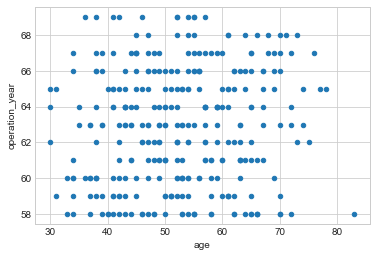

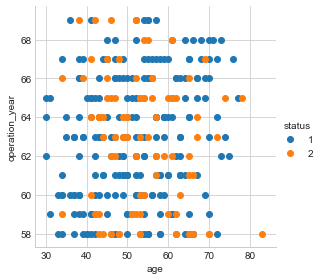

In [28]:
## 2D Scatter Plots

## 1. age and operation year
hb.plot(kind='scatter', x='age', y='operation_year') ;
mp.show()

## with colouring
sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", size=4) \
   .map(mp.scatter, "age", "operation_year") \
   .add_legend();
mp.show();

Data is not interpretable and also not linearly separable. Lets go to other feature-combination

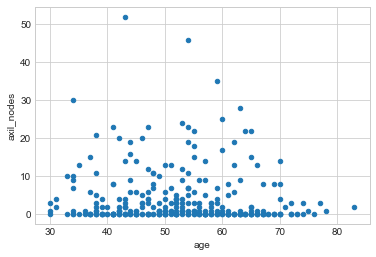

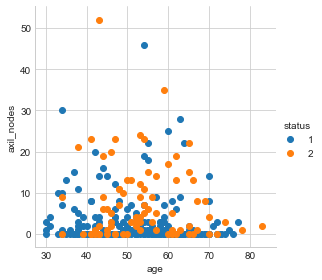

In [31]:
## 2. age and axil nodes
hb.plot(kind='scatter', x='age', y='axil_nodes') ;
mp.show()

## with colouring
sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", size=4) \
   .map(mp.scatter, "age", "axil_nodes") \
   .add_legend();
mp.show();

Data is not interpretable and also not linearly separable. Lets go to other feature-combination

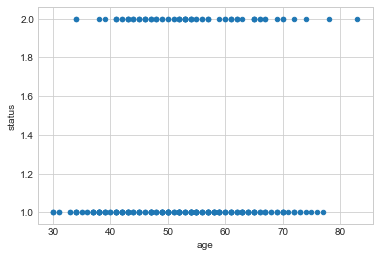

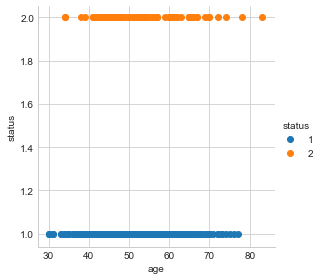

In [32]:
## 3. age and status

hb.plot(kind='scatter', x='age', y='status') ;
mp.show()

## with colouring
sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", size=4) \
   .map(mp.scatter, "age", "status") \
   .add_legend();
mp.show();

Observations:- : Linearly separable. We can conclude that the chances of living more than 5 years and less than 5 years are equally spread in the ages section.

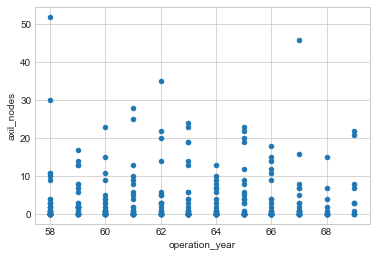

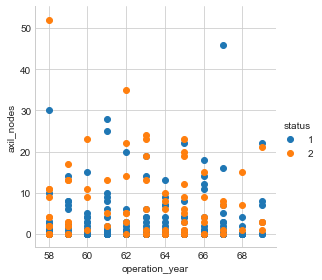

In [33]:
## 4. operation year and axil nodes

hb.plot(kind='scatter', x='operation_year', y='axil_nodes') ;
mp.show()

## with colouring
sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", size=4) \
   .map(mp.scatter, "operation_year", "axil_nodes") \
   .add_legend();
mp.show();

Not linearly separable or much interpretable.

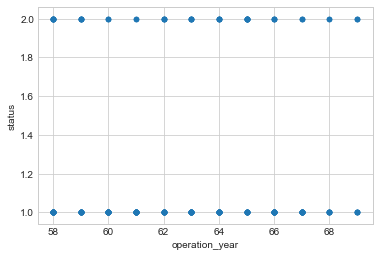

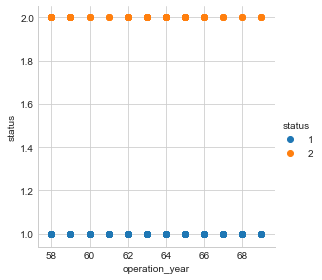

In [35]:
## 5 Operation year and status

hb.plot(kind='scatter', x='operation_year', y='status') ;
mp.show()

sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", size=4) \
   .map(mp.scatter, "operation_year", "status") \
   .add_legend();
mp.show();

Observations:- : Linearly separable. We can conclude that the chances of living more than 5 years and less than 5 years are equally spread in the ages section.

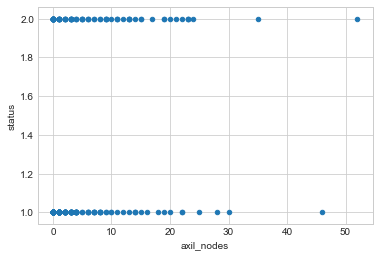

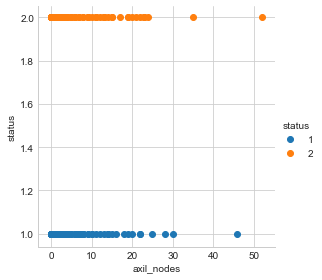

In [54]:
## Axil nodes vs Status


## 6. axil nodes

hb.plot(kind='scatter', x='axil_nodes', y='status') ;
mp.show()

sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", size=4) \
   .map(mp.scatter, "axil_nodes", "status") \
   .add_legend();
mp.show();

for axil nodes upto 20 there are equal number of points for "status". As of now, nothing is interpretable lets proceed

# Observations
All features(axil nodes, operation year and age) show linearly separable plots with status. So "status" is definitely one of the feature

# Pair Plots

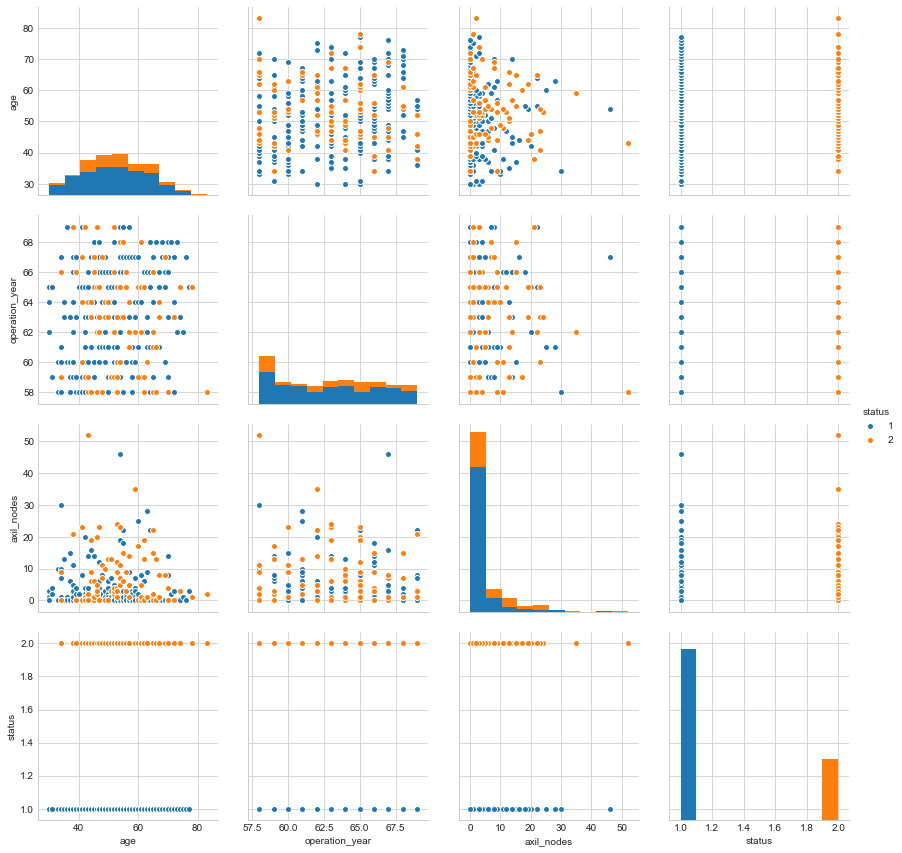

In [37]:
## 3D Scatter plot

mp.close();
sns.set_style("whitegrid");
sns.pairplot(hb, hue="status", size=3);
mp.show()

# Histograms, PDFs, CDFs

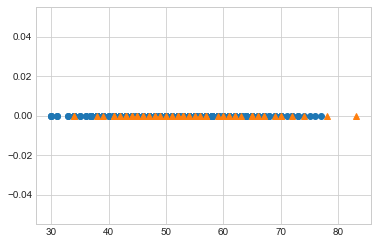

In [40]:
## 1D Scatter Plots

survived_long = hb.loc[hb["status"]==1];
survived_short = hb.loc[hb["status"]==2];


mp.plot(survived_long["age"], np.zeros_like(survived_long['age']), 'o')
mp.plot(survived_short["age"], np.zeros_like(survived_short['age']), '^')

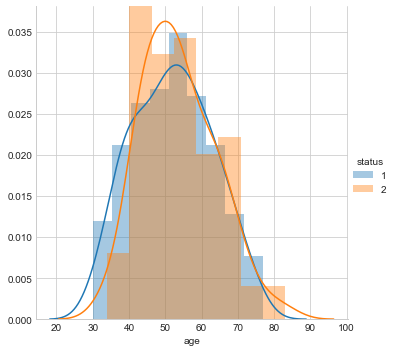

In [44]:
## HISTOGRAMS  ##UNIVARIATE ANALYSIS
# We are going to plot histograms for better understanging of 1D plot and then analyse them for each and every feature 
# and choose which amongst them is the best(best separates and less overlaps), this in turn is called
# Univariate analysis

## 1. Histogram for Age


##Following warning says some argument that you’ve passed is deprecated and in future versions, it might get removed. 
#It is okay. You can use it now. Suppress them to make your notebook more presentable. 


import warnings
warnings.filterwarnings('ignore')

s1=sns.FacetGrid(hb, hue="status", size=5)
s1=s1.map(sns.distplot,"age")
s1=s1.add_legend()

mp.show()

##Following warning says some argument that you’ve passed is deprecated and in future versions, it might get removed. 
#It is okay. You can use it now. Suppress them to make your notebook more presentable. 




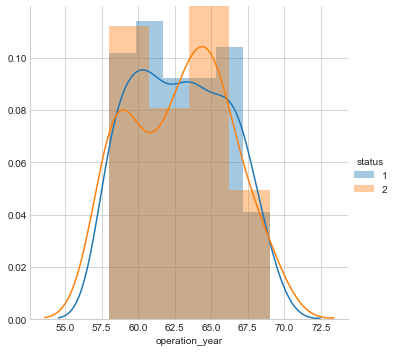

In [45]:
## 2. Histogram and pdf for operation year


s1=sns.FacetGrid(hb, hue="status", size=5)
s1=s1.map(sns.distplot,"operation_year")
s1=s1.add_legend()

mp.show()

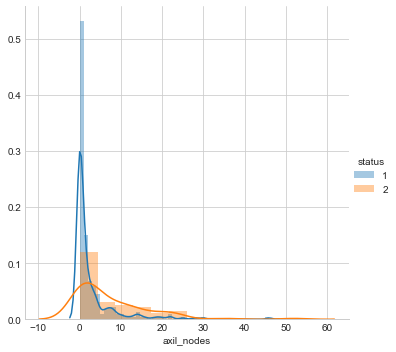

In [46]:
## 3. Histogram and pdf for axil nodes

s1=sns.FacetGrid(hb, hue="status", size=5)
s1=s1.map(sns.distplot,"axil_nodes")
s1=s1.add_legend()

mp.show()

# Observations:-

axil nodes for people of status 2 is having more deviation and more spread than the people with status 1.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


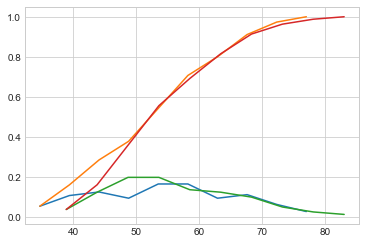

In [49]:
# Plots of CDF of "age" for status 1 and status 2.


# Survived long

counts, bin_edges = np.histogram(survived_long['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:],pdf)
mp.plot(bin_edges[1:], cdf)


# Survived short
counts, bin_edges = np.histogram(survived_short['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:],pdf)
mp.plot(bin_edges[1:], cdf)

# Mean,  Std-deviation,

In [71]:
#Mean, Variance, Std-deviation,  
print("Means:")
print('Mean value of age for people who survived longer is ',np.mean(survived_long["age"]))
#Mean with an outlier.
print('Mean value of age for people who survived longer with outlier is ' ,np.mean(np.append(survived_long["age"],1500)));
print('Mean value of age for people who survived shorter is ',np.mean(survived_short["age"]))

print('************************')
print('Mean value of axil nodes for people who survived longer is ',np.mean(survived_long["axil_nodes"]))
print('Mean value of axil nodes for people who survived shorter is ',np.mean(survived_short["axil_nodes"]))
print('************************')

print('Mean value of operation year for people who survived longer is ',np.mean(survived_long["operation_year"]))
print('Mean value of operation year for people who survived longer is ',np.mean(survived_short["operation_year"]))

print("\nStd-deviations:");
print('Standard deviation of age for people who survived longer is' ,np.std(survived_long["age"]))  
print('Standard deviation of age for people who survived shorter is',np.std(survived_short["age"]))
print('Standard deviation of axil_nodes for people who survived longer is' ,np.std(survived_long["axil_nodes"]))  
print('Standard deviation of axil_nodes for people who survived shorter is',np.std(survived_short["axil_nodes"]))
print('Standard deviation of operation year for people who survived longer is' ,np.std(survived_long["operation_year"]))  
print('Standard deviation of operation year for people who survived shorter is',np.std(survived_short["operation_year"]))

Means:
Mean value of age for people who survived longer is  52.01777777777778
Mean value of age for people who survived longer with outlier is  58.424778761061944
Mean value of age for people who survived shorter is  53.67901234567901
************************
Mean value of axil nodes for people who survived longer is  2.7911111111111113
Mean value of axil nodes for people who survived shorter is  7.45679012345679
************************
Mean value of operation year for people who survived longer is  62.86222222222222
Mean value of operation year for people who survived longer is  62.82716049382716

Std-deviations:
Standard deviation of age for people who survived longer is 10.98765547510051
Standard deviation of age for people who survived shorter is 10.10418219303131
Standard deviation of axil_nodes for people who survived longer is 5.857258449412131
Standard deviation of axil_nodes for people who survived shorter is 9.128776076761632
Standard deviation of operation year for people w

#  Median, Percentile, Quantile, IQR, MAD

In [78]:
print("Medians:")
print(np.median(survived_long["age"]))
#Mean with an outlier.
print('Mean value with outlier' ,np.median(np.append(survived_long["age"],150)));
print(np.median(survived_short["age"]))

print('******************************')

print("\nQuantiles for age for people who lived longer and lived shorter:")
print(np.percentile(survived_long["age"],np.arange(0, 100, 25)))
print(np.percentile(survived_short["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles for age:")
print(np.percentile(survived_long["age"],90))
print(np.percentile(survived_short["age"],90))


Medians:
52.0
Mean value with outlier 52.0
53.0
******************************

Quantiles for age for people who lived longer and lived shorter:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles for age:
67.0
67.0


Observations:-
this means 75 percentile of people who survived longer are of 60 age whereas 75 percentile of people who survived shorter are of 61 age.
And there are no people for lived longer and had been diagnosed with breast cancer at 30 whereas 34 for who lived shorter.

Also this means 90 percentile of people who survived long as well as short are within the age of 67

In [79]:
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survived_long["age"]))
print(robust.mad(survived_short["age"]))


Median Absolute Deviation
13.343419966550417
11.860817748044816


# Box Plot and Whiskers

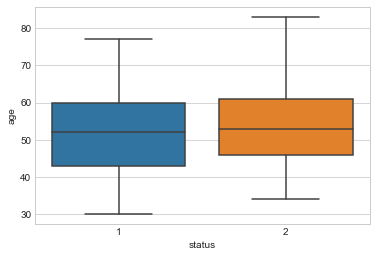

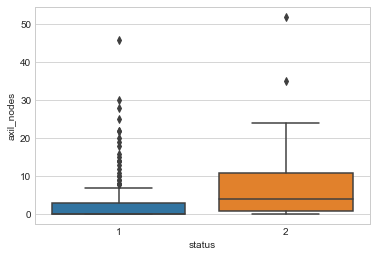

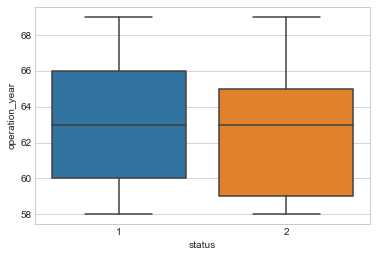

In [82]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='status',y='age', data=hb)
mp.show()

sns.boxplot(x='status',y='axil_nodes', data=hb)
mp.show()

sns.boxplot(x='status',y='operation_year', data=hb)
mp.show()

# Violin Plots

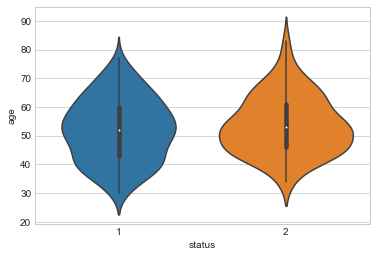

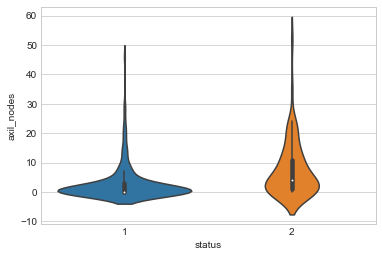

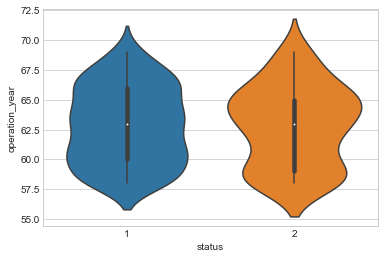

In [83]:
sns.violinplot(x="status", y="age", data=hb, size=8)
mp.show()

sns.violinplot(x="status", y="axil_nodes", data=hb, size=8)
mp.show()

sns.violinplot(x="status", y="operation_year", data=hb, size=8)
mp.show()

# Multivariate probability density, contour plot.
 

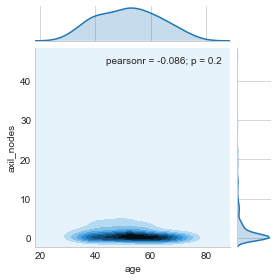

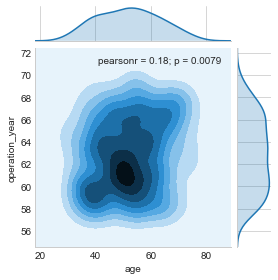

In [93]:
## different features plot for people who survived long

sns.jointplot(x="age", y="axil_nodes", data=survived_long, kind="kde",size=4);
mp.show();

sns.jointplot(x="age", y="operation_year", data=survived_long, kind="kde",size=4);
mp.show();


Observations
For people who survived longer, most of the axil nodes are distributed densely for people in the age of 40 to 60.
For people who survived longer, most of the operation year are distributed densely for people in the age of 50 to 55.


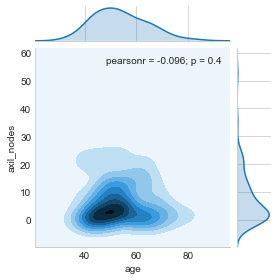

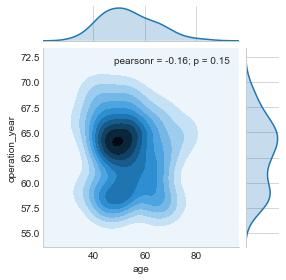

In [92]:
## different features plot for people who survived short

sns.jointplot(x="age", y="axil_nodes", data=survived_short, kind="kde",size=4);
mp.show();

sns.jointplot(x="age", y="operation_year", data=survived_short, kind="kde",size=4);
mp.show();


Observations

For people who survived shorter, most of the axil nodes roughly about 2-3 are distributed densely for people in the age of roughly 50.
For people who survived shorter, most of the operation year are between 63 to 65 and distributed densely for people
of the age 50.